## Homework

In this homework, we will use Credit Card Data from [the previous homework](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/04-evaluation/homework.md).

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

## Question 1

* Install Pipenv
* What's the version of pipenv you installed?
* Use `--version` to find out

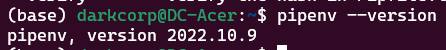
**pipenv, version 2022.10.9**

## Question 2

* Use Pipenv to install Scikit-Learn version 1.0.2
* What's the first hash for scikit-learn you get in Pipfile.lock?

Note: you should create an empty folder for homework
and do it there. 


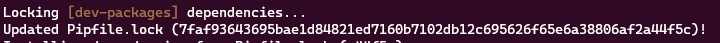
**7faf93643695bae1d84821ed7160b7102db12c695626f65e6a38806af2a44f5c**

## Models

We've prepared a dictionary vectorizer and a model.

They were trained (roughly) using this code:

```python
features = ['reports', 'share', 'expenditure', 'owner']
dicts = df[features].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X = dv.fit_transform(dicts)

model = LogisticRegression(solver='liblinear').fit(X, y)
```

> **Note**: You don't need to train the model. This code is just for your reference.

And then saved with Pickle. Download them:

* [DictVectorizer](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/05-deployment/homework/dv.bin?raw=true)
* [LogisticRegression](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/05-deployment/homework/model1.bin?raw=true)

With `wget`:

```bash
PREFIX=https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/course-zoomcamp/cohorts/2022/05-deployment/homework
wget $PREFIX/model1.bin
wget $PREFIX/dv.bin
```

## Question 3

Let's use these models!

* Write a script for loading these models with pickle
* Score this client:

```json
{"reports": 0, "share": 0.001694, "expenditure": 0.12, "owner": "yes"}
```

What's the probability that this client will get a credit card? 

* **0.162**
* 0.391
* 0.601
* 0.993

If you're getting errors when unpickling the files, check their checksum:

```bash
$ md5sum model1.bin dv.bin
3f57f3ebfdf57a9e1368dcd0f28a4a14  model1.bin
6b7cded86a52af7e81859647fa3a5c2e  dv.bin
```

In [2]:
pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6008 sha256=41293ac2aa08d37dc667036b1d040229931499db971c299296c7865fc8635a9a
  Stored in directory: c:\users\darkcorp\appdata\local\pip\cache\wheels\58\c6\8b\061bd4edc8cea2b2235758c3e50473d08499236fbfdd21e6b3
Successfully built pickle-mixin
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pickle

In [8]:
model_file = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/05-deployment/homework/model1.bin?raw=true'
dict_vectorizer_file = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/05-deployment/homework/dv.bin?raw=true'

In [11]:
with open(model_file, 'rb') as f_in_model:
    model = pickle.load(f_in_model)
f_in_model.close()

with open(dict_vectorizer_file, 'rb') as f_in_dv:
    dv = pickle.load(f_in_dv)
f_in_dv.close()

In [12]:
dv, model

(DictVectorizer(sparse=False), LogisticRegression(solver='liblinear'))

In [13]:
customer = {"reports": 0, "share": 0.001694, "expenditure": 0.12, "owner": "yes"}

In [16]:
X = dv.transform([customer])
X

array([[0.12    , 0.      , 1.      , 0.      , 0.001694]])

In [18]:
model.predict_proba(X)[0, 1]

0.16213414434326598

## Question 4

Now let's serve this model as a web service

* Install Flask and gunicorn (or waitress, if you're on Windows)
* Write Flask code for serving the model
* Now score this client using `requests`:

```python
url = "YOUR_URL"
client = {"reports": 0, "share": 0.245, "expenditure": 3.438, "owner": "yes"}
requests.post(url, json=client).json()
```

What's the probability that this client will get a credit card?

* 0.274
* 0.484
* 0.698
* **0.928**

In [7]:
import requests

url = 'http://127.0.0.1:9696/ping'
response = requests.get(url).text
response

'PONG'

In [13]:
url = 'http://localhost:9696/predict'
client = {"reports": 0, "share": 0.245, "expenditure": 3.438, "owner": "yes"}
response = requests.post(url, json=client).json()
response

0.9282218018527452

## Docker

Install [Docker](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/05-deployment/06-docker.md). We will use it for the next two questions.

For these questions, we prepared a base image: `svizor/zoomcamp-model:3.9.12-slim`. 
You'll need to use it (see Question 5 for an example).

This image is based on `python:3.9.12-slim` and has a logistic regression model 
(a different one) as well a dictionary vectorizer inside. 

This is how the Dockerfile for this image looks like:

```docker 
FROM python:3.9.12-slim
WORKDIR /app
COPY ["model2.bin", "dv.bin", "./"]
```

We already built it and then pushed it to [`svizor/zoomcamp-model:3.9.12-slim`](https://hub.docker.com/r/svizor/zoomcamp-model).

> **Note**: You don't need to build this docker image, it's just for your reference.

## Question 5

Download the base image `svizor/zoomcamp-model:3.9.12-slim`. You can easily make it by using [docker pull](https://docs.docker.com/engine/reference/commandline/pull/) command.

So what's the size of this base image?

* 15 Mb
* **125 Mb**
* 275 Mb
* 415 Mb

You can get this information when running `docker images` - it'll be in the "SIZE" column.

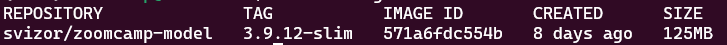
REPOSITORY              TAG           IMAGE ID       CREATED      SIZE
svizor/zoomcamp-model   3.9.12-slim   571a6fdc554b   8 days ago   125MB

## Dockerfile

Now create your own Dockerfile based on the image we prepared.

It should start like that:

```docker
FROM svizor/zoomcamp-model:3.9.12-slim
# add your stuff here
```

Now complete it:

* Install all the dependencies form the Pipenv file
* Copy your Flask script
* Run it with Gunicorn 

After that, you can build your docker image.

## Question 6

Let's run your docker container!

After running it, score this client once again:

```python
url = "YOUR_URL"
client = {"reports": 0, "share": 0.245, "expenditure": 3.438, "owner": "yes"}
requests.post(url, json=client).json()
```

What's the probability that this client will get a credit card now?

* 0.289
* 0.502
* 0.769
* 0.972

I had to go to WLS 2 from WLS 1 while making the Docker work right.
After that I can't access my /home directory via windows explorer as it is inside ext4.vhdx now.
How can I push my Dockerfile into Ubuntu?

## Submit the results

* Submit your results here: https://forms.gle/jU2we8f9WeLgX3qa6
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one

## Deadline

The deadline for submitting is **10 October 2022 (Monday), 23:00 CEST (Berlin time)**. 

After that, the form will be closed.